## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import shap

## Load Dataset

In [2]:
df_main = pd.read_csv('cleaned_parishousing_dataset.csv')
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [5]:
df_test.columns

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

In [3]:
x_train = np.array(df_train.drop(['price'], axis=1))
x_test = np.array(df_test.drop(['price'], axis=1))
y_train = np.array(df_train['price'])
y_test = _train = np.array(df_test['price'])

## Train Model

In [4]:
lr_model = LinearRegression()

In [5]:
lr_model.fit(x_train, y_train)

LinearRegression()

## SHAP

In [7]:
x, y = df_main.drop(['price'], axis=1), df_main['price']

In [8]:
#examine model coefficient
print('LR Model Coefficients:\n')
for i in range (x_train.shape[1]):
    print(x.columns[i], '=', lr_model.coef_[i].round(4))

LR Model Coefficients:

squareMeters = 99.9999
numberOfRooms = -0.3224
hasYard = 3048.0745
hasPool = 2961.8277
floors = 55.187
cityCode = -0.0012
cityPartRange = 58.6305
numPrevOwners = -7.6271
made = -2.9071
isNewBuilt = 190.4631
hasStormProtector = 104.1743
basement = -0.006
attic = -0.0042
garage = 0.0836
hasStorageRoom = -1.9534
hasGuestRoom = -9.0139


While coefficients are great for telling us what will happen when we change the value of an input feature, by themselves they are not a great way to measure the overall importance of a feature. This is because the value of each coefficient depends on the scale of the input features. <br>
<b>Ref: SHAP Documentation</b>

### SHAP Partial Dependence Plot

In [14]:
x100 = shap.utils.sample(df_train.drop(['price'], axis=1), 100) #100 samples for use

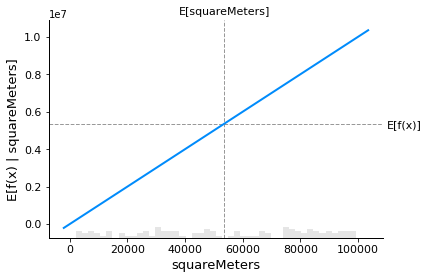

In [12]:
shap.partial_dependence_plot('squareMeters', lr_model.predict, x100, ice=False, model_expected_value=True, feature_expected_value=True)

The gray horizontal line in the plot above represents the expected value of the model when applied to the Paris housing dataset. <br>
The vertical gray line represents the average value of the median income feature. <br>
Blue partial dependence plot line, which the is average value of the model output when we fix the feature to a given value,  always passes through the interesection of the two gray expected value lines. <br>
<b>Ref: SHAP Doc.</b>

#### Read SHAP Values from Plot

In [13]:
#copute SHAP values
explainer = shap.Explainer(lr_model.predict, x100)
shap_values = explainer(x_train)

Permutation explainer: 7001it [05:49, 19.89it/s]                                                                       


In [16]:
import matplotlib.pyplot as plt

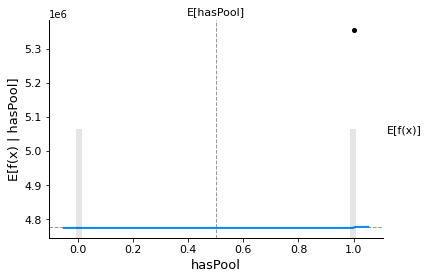

In [29]:
#plot dependence
sample_ind = 20
shap.partial_dependence_plot('hasPool', lr_model.predict, x100, model_expected_value=True,feature_expected_value=True, ice=False,shap_values=shap_values[sample_ind:sample_ind+1, :])
                             #, show=False)
#plt.savefig('SHAP Dependence', dpi=1800)

In [31]:
shap_values

.values =
array([[ 3.62152267e+06, -6.27684630e+00, -1.67644099e+03, ...,
         4.80156669e+00,  9.76678579e-01,  4.54298125e+01],
       [-2.65837155e+06, -1.17574003e+01,  1.37163354e+03, ...,
         1.60826579e+01, -9.76678579e-01, -3.56948527e+01],
       [ 1.59432453e+06, -8.21115949e+00, -1.67644099e+03, ...,
         6.55640311e+00,  9.76678578e-01, -2.66810010e+01],
       ...,
       [-4.18173615e+05, -1.43364846e+01, -1.67644099e+03, ...,
        -2.71197434e+01,  9.76678579e-01,  3.60554066e-01],
       [-2.01887214e+06, -1.04678582e+01, -1.67644099e+03, ...,
         8.81262136e+00,  9.76678578e-01,  4.54298125e+01],
       [ 6.10225439e+05,  2.74994858e+00,  1.37163354e+03, ...,
         1.55812761e+01, -9.76678579e-01,  3.60554067e-01]])

.base_values =
array([5352028.91637489, 5352028.91637489, 5352028.91637489, ...,
       5352028.91637489, 5352028.91637489, 5352028.91637489])

.data =
array([[89671,    71,     0, ...,   583,     0,     0],
       [26872,    88,   

<Figure size 1440x1440 with 0 Axes>

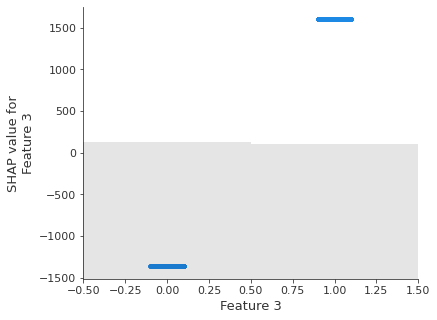

In [30]:
plt.figure(figsize=(20,20))
shap.plots.scatter(shap_values[:, 'Feature 3'])

#### Additive Nature of SHAP

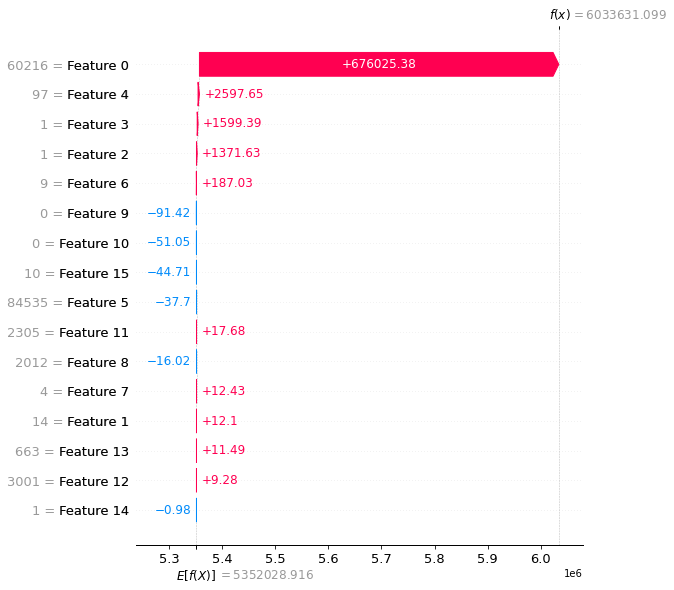

In [28]:
shap.plots.waterfall(shap_values[sample_ind], max_display=16)

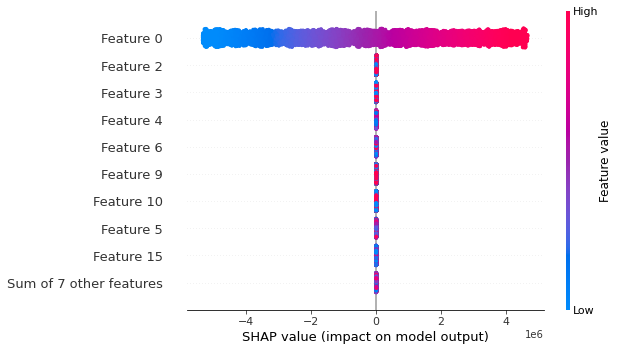

In [32]:
shap.plots.beeswarm(shap_values)

## Model Evaluate

In [33]:
lr_model.score(x_test, y_test)

0.999999561980484

## Dump Model

In [11]:
import pickle

In [12]:
#write pickle file
with open('lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
f.close()

In [ ]:
#read pickle file
#with open('lr_model.pkl'. 'rb') as f:
#    load_lr = pickle.load(f)